In [1]:
#importing the libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
#read the data

In [5]:
df=pd.read_csv('health care diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# to know the datatype of the variable 'df'
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#describe function computes basic statistics for all cotinuos varaibles .Any NAN values are skipped.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# the transpose() function is used to transpose index and columns.
#Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
df['Glucose'].describe().transpose()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [15]:
#THE OUTCOME IS EITHER 0 or 1.'0' BEING NON-DIABETIC AND '1' BEING DIABETIC.
#LETS FIND OUT HOW MANY ARE DIABETIC (WE SHALL USE GROUP BY FUNCTION)

In [16]:
#size gives the count of diabetic and non-diabetic. 500 non diabetic,268 diabetic 
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

median values of glucose is  117.0


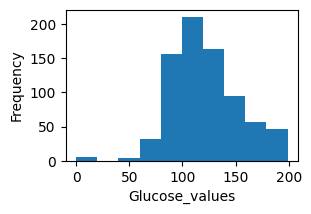

In [17]:
# for the matplotlib function figure() the specifications of the graph such as width which is 6
# 4 which isthe height and pixels per inch(dpi-meaning the resolution )is provided.
#x labelis given a 'Glucose values'
plt.figure(figsize=(3,2),dpi=100)
plt.xlabel('Glucose_values')
plt.ylabel('Frequency')
df['Glucose'].plot.hist()
sns.set_style=('ticks')
print('median values of glucose is ',df['Glucose'].median())

In [18]:
#From the graph it is clear that most of the patients have glucose value between 100-150 mg/l 

In [19]:
#CREATING A BOX PLOT TO KNOW THE 

<AxesSubplot:xlabel='Glucose'>

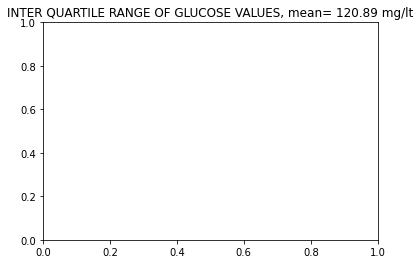

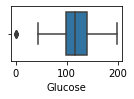

In [20]:
plt.title('INTER QUARTILE RANGE OF GLUCOSE VALUES, mean= 120.89 mg/lt')
plt.figure(figsize=(2,1))
sns.boxplot(x=df['Glucose'])

In [21]:
#BOX PLOT IQR SHOWS RANGE FROM 40 TO 200 WITH FEW OUTILERS NEAR ZERO.

#BLUE REATANGLE DENOTES THE 'IQR RANGE'.LEFT EDGE REPRESENTS LOWER QUARTILE(Q1) , RIGHT EDGE REPRESENTS UPPER QUARTILE(Q3).
#LEFT WHISKER MINMUM IS (Q1-1.5(IQR), RIGHT WHISKER (MAXMIMUM) IS (Q3+1.5(IQR))

In [22]:
# similarly vreate histogram for blood presure

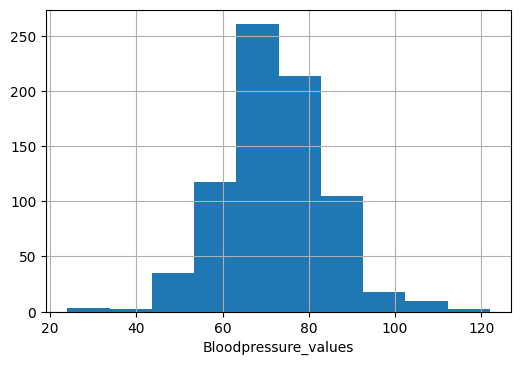

In [23]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Bloodpressure_values')
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['BloodPressure'].hist().plot()
sns.set_style=('ticks')

In [24]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['BloodPressure'].tail()

763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, dtype: int64

In [25]:
#this is done to check ifthere are any 'zerovalues in the column'
count_zero=(df['BloodPressure']==0).sum()
count_zero

0

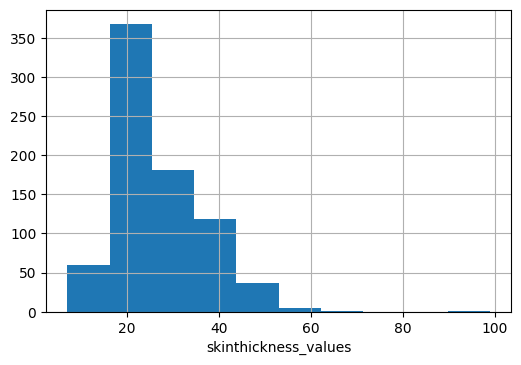

In [26]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('skinthickness_values')
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['SkinThickness'].hist().plot()
sns.set_style=('ticks')

In [27]:
#this is done to check ifthere are any 'zerovalues in the column'
count_zero=(df['SkinThickness']==0).sum()
count_zero

0

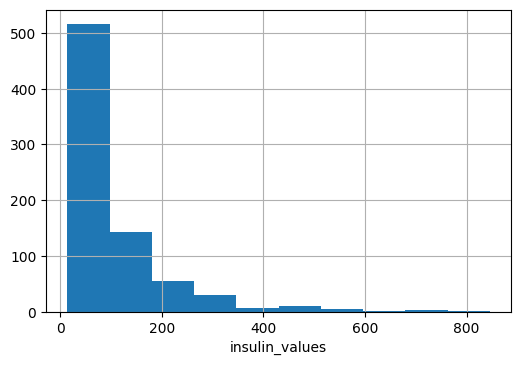

In [28]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('insulin_values')
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['Insulin'].hist().plot()
sns.set_style=('ticks')

In [29]:
#this is done to check ifthere are any 'zerovalues in the column'
count_zero=(df['Insulin']==0).sum()
count_zero

0

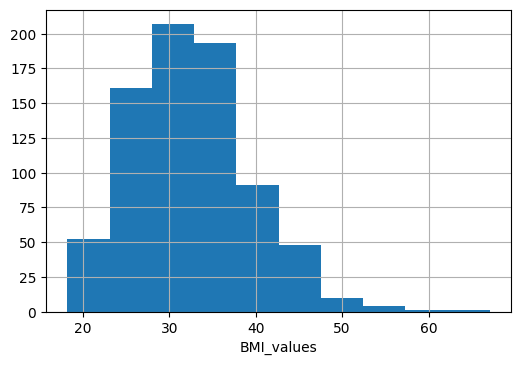

In [30]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI_values')
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BMI'].hist().plot()
sns.set_style=('ticks')

In [31]:
#this is done to check ifthere are any 'zerovalues in the column'
count_zero=(df['BMI']==0).sum()
count_zero

0

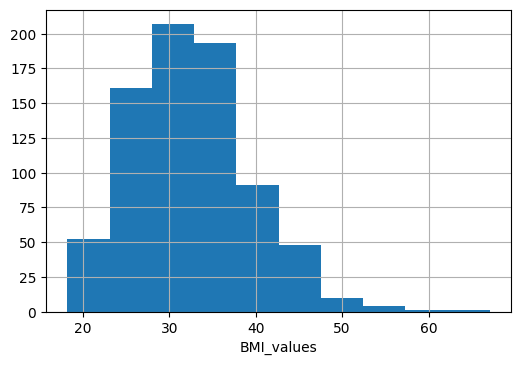

In [32]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI_values')
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BMI'].hist().plot()
sns.set_style=('ticks')

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

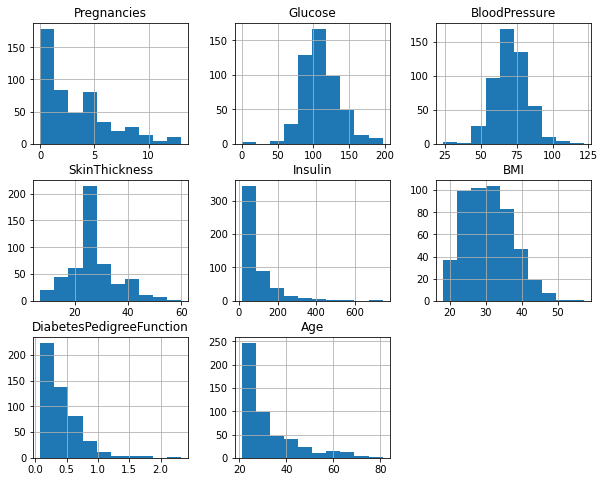

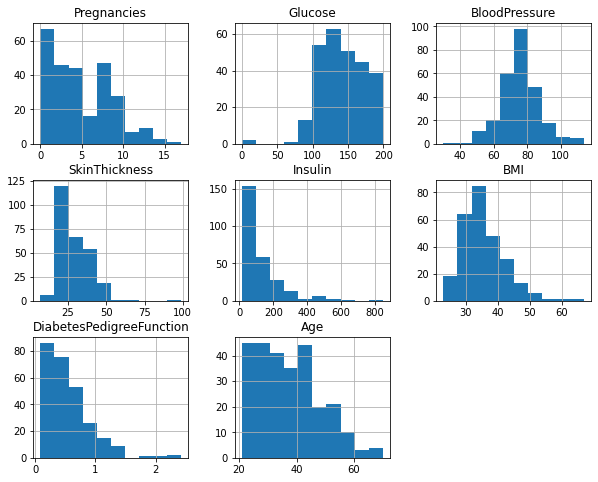

In [33]:
df.groupby('Outcome').hist(figsize=(10,8))

In [34]:
#obsrvations:
#1BLOOD GLUCOSE CAN NEVER BE ZERO
#2 BMI LESS THA 20 INDICATES VERY LOW BAODY FAT,AN ATHELETE CAN HAVE THAT TYPE. 


# GETTING THE VALUE COUNTS

In [35]:
df1=df['Glucose'].value_counts()
df1.head

<bound method NDFrame.head of 100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64>

In [36]:
df1=df['BloodPressure'].value_counts()
df1.head(5)

72    79
70    57
74    52
68    45
78    45
Name: BloodPressure, dtype: int64

In [37]:
df1=df['SkinThickness'].value_counts()
df1.head(5)

23    249
32     31
30     27
27     23
33     20
Name: SkinThickness, dtype: int64

In [38]:
df1=df['Insulin'].value_counts()
df1.head(5)

30.5     374
105.0     11
140.0      9
130.0      9
120.0      8
Name: Insulin, dtype: int64

In [39]:
df1=df['BMI'].value_counts()
df1.head(5)

32.0    24
31.6    12
31.2    12
33.3    10
32.4    10
Name: BMI, dtype: int64

In [40]:
df['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Insulin'].value_count()

KeyError: ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Insulin')

In [41]:
df1=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Insulin']].apply(pd.Series.value_counts)
df1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Insulin
0.0,5.0,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,2.0,NaN,NaN,NaN
8.0,NaN,NaN,2.0,NaN,NaN,NaN
10.0,NaN,NaN,5.0,NaN,NaN,NaN
11.0,NaN,NaN,6.0,NaN,NaN,NaN


In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
#count of the datatypes
df1=df.dtypes.value_counts()
df1

int64      6
float64    3
dtype: int64

<AxesSubplot:xlabel='datatype', ylabel='Frequency'>

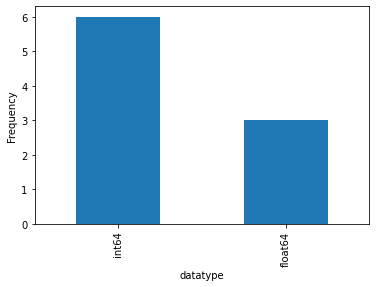

In [44]:
#PLOTTING THE COUNT FREQUENCY OF DATATYPES
#THIS SHOWS THE FREQUENCY OF FLOAT AND INTEGER DATATYPES IN DATASET

df1=df.dtypes.value_counts().plot(xlabel='datatype',ylabel= 'Frequency' ,kind='bar')
df1

In [45]:
df1=df.groupby('Outcome').count()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


<AxesSubplot:title={'center':'Data Imbalance Check'}, xlabel='Outcome', ylabel='Frequency'>

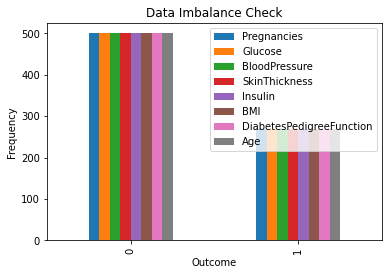

In [46]:
# DATA IMBALANCE CHECK

df1.plot(xlabel='Outcome',ylabel='Frequency',title ='Data Imbalance Check',kind='bar')

In [47]:
#FROMTHE BALANCE OF DATA OATINED FROM OUTCOME COUNT IT IS OBSERVED THAT no of positive cases is half than that of no of non-positive cases.There is a clear imbalance in DATA

In [48]:
# SCATTER PLOT

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

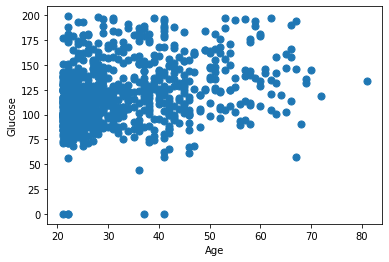

In [49]:
df1=df.plot.scatter(y='Glucose',x='Age',s=50)
df1

In [50]:
#better method is usng the pair plots so that relationship between different varibales are auto created using pair plots 

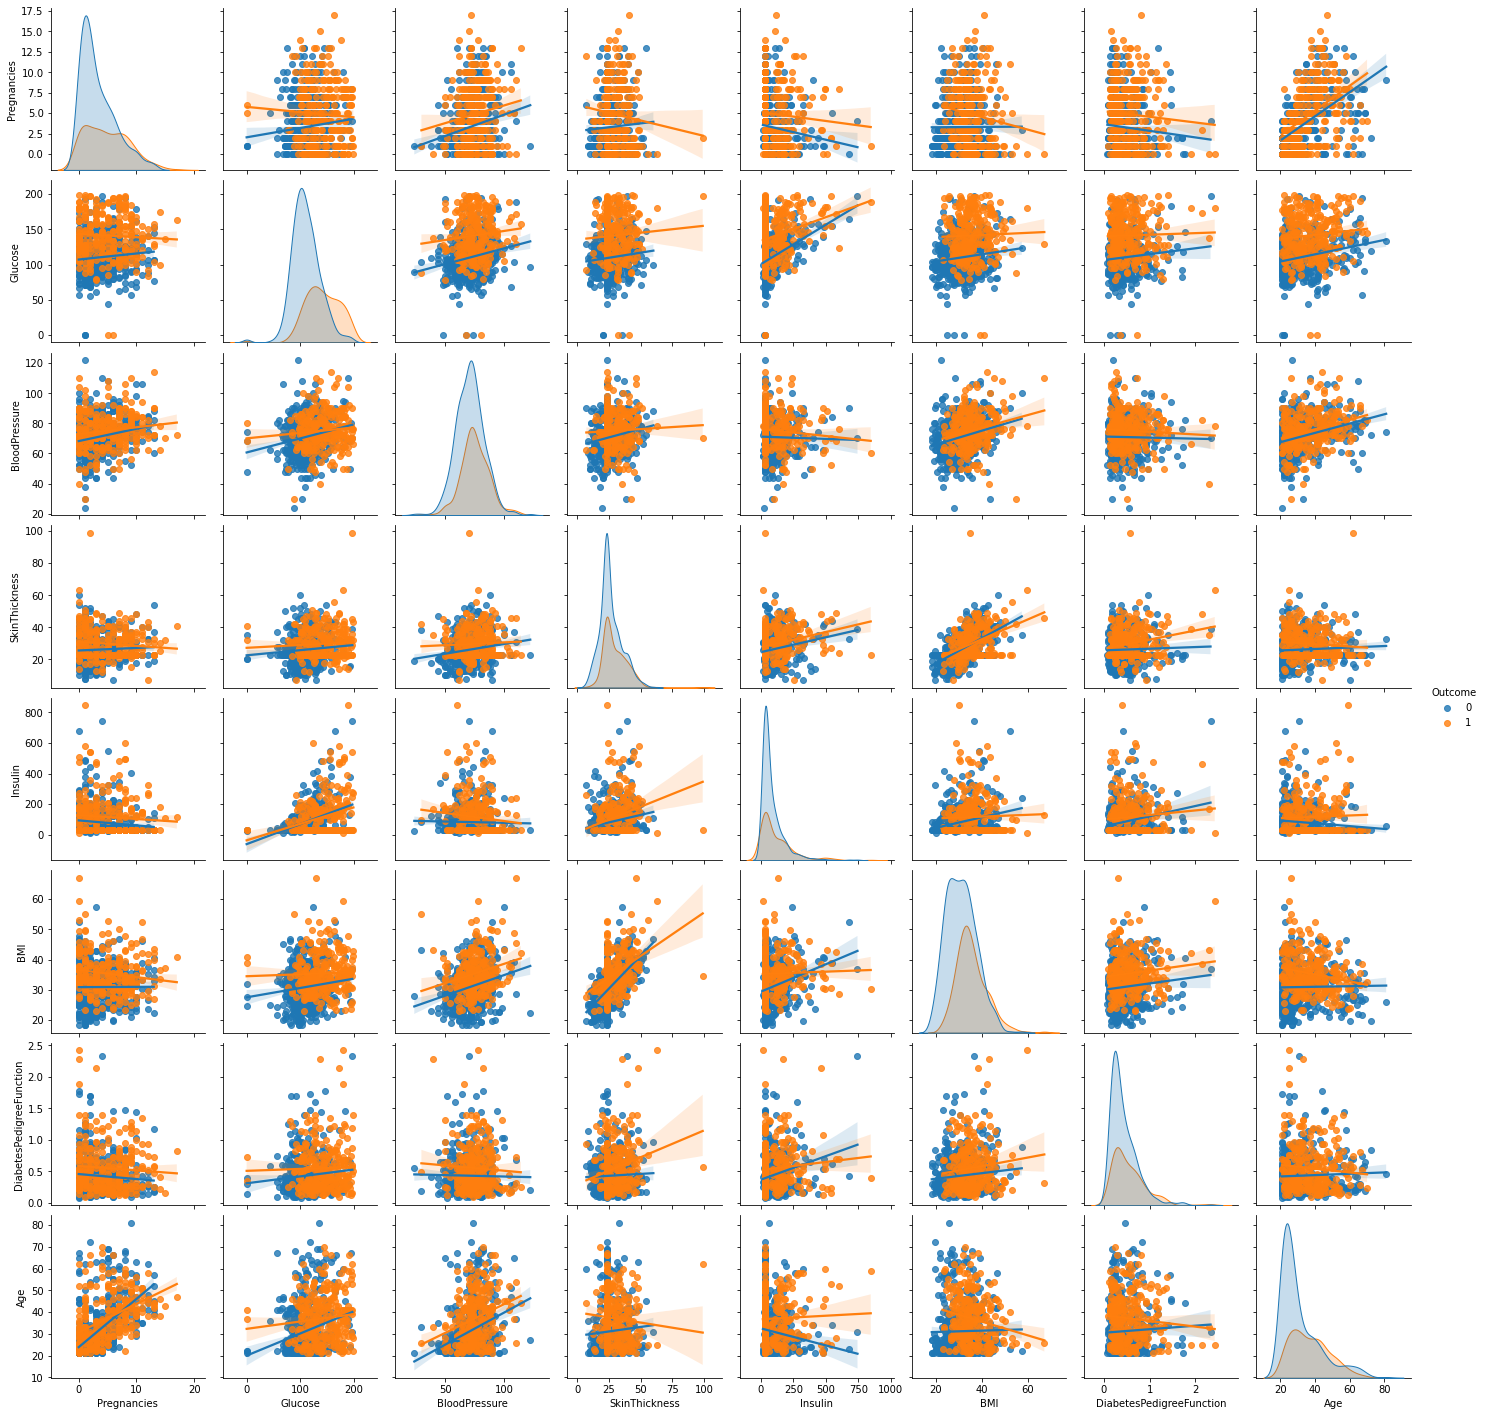

In [51]:
#ADDING A REGRESSION LINE
df1=sns.pairplot(df,kind='reg',hue='Outcome')
df1

In [52]:
# finding correlation
df1=df.corr(method='pearson')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217870,0.158027,0.355252,0.218806,0.137337,0.263514,0.466581
BloodPressure,0.208615,0.217870,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.158027,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.355252,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.218806,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [53]:
#FROM THE ABOVE CORRELATION ONLY BMI AND SKIN THICKNESS SHOW POSIITIVE CORRELATION WITH ALLTHE VARIABLES. 

In [54]:
#HEATMAP USING CORRELATION

In [55]:
cmap='tab20'

<AxesSubplot:>

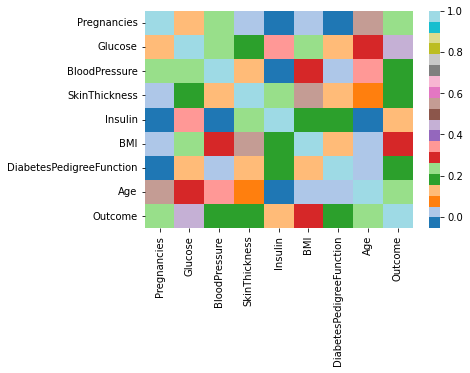

In [56]:
hm=sns.heatmap(df1, cmap=cmap)
hm

In [57]:
# obsrvations from heatmap
#Non o the variables are highly correlated,they have modrate values
Maximum no of green squares are present which has  a corr value of 0.2
#outcome is moderatesly correlated to glucose at 0.45.


SyntaxError: invalid syntax (<ipython-input-57-46cf6a98fc2f>, line 3)

In [ ]:
#DATA MODELLING- Binary Classification
Binary classification refers to those classification tasks that have two class labels.
#Examples include:

#Email spam detection (spam or not).
#Conversion prediction (buy or not).
#Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.
#For example “not spam” is the normal state and “spam” is the abnormal state. Another example is “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.
#The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.
#It is common to model a binary classification task with a model that predicts a Bernoulli probability distribution for each example.
#The Bernoulli distribution is a discrete probability distribution that 
#covers a case where an event will have a binary outcome as either a 0 or 1. 
#For classification, this means that the model predicts a probability of 
#an example belonging to class 1, or the abnormal state.

In [ ]:
#We have several ways to build the model for binary/multi-class classification. Few of them are listed below:
#Logistics Regression
#Naive Bayes classification
#Stochastic Gradient Descent
#K-Nearest Neighbours
#Decision Tree
#Random Forest
#Support Vector Machine

# Logistic Regression Method

In [ ]:
#since we have already replacethe 0 VALUES WITH MEDIAN FOR ALLCOLUMNS EXCEPT PREGNANCY COLUMN(IN PREGNANCY COLUMN 0VALUE IS VALID 0 INDICATES THE PERSON IS NOT PREGANANT)

In [ ]:
#split the data into train and test data

In [61]:
# CHECKTHE PREICTOR COLUMNS SHAPE and target columns shape
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y=df[['Outcome']]
Y=Y.values.ravel()

In [62]:
X.shape

(768, 8)

In [63]:
Y.shape

(768,)

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y ,test_size=0.25, random_state=40)

In [65]:
X_train.shape

(576, 8)

In [66]:
X_test.shape

(192, 8)

In [67]:
Y_train.shape

(576,)

In [68]:
Y_test.shape

(192,)

In [69]:
X_train.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
722,1,149,68,29,127.0,29.3,0.349,42
508,2,84,50,23,76.0,30.4,0.968,21
182,1,0,74,20,23.0,27.7,0.299,21
3,1,89,66,23,94.0,28.1,0.167,21
37,9,102,76,37,30.5,32.9,0.665,46


In [70]:
X_test.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
132,3,170,64,37,225.0,34.5,0.356,30
239,0,104,76,23,30.5,18.4,0.582,27
688,1,140,74,26,180.0,24.1,0.828,23
181,0,119,64,18,92.0,34.9,0.725,23
137,0,93,60,25,92.0,28.7,0.532,22


In [71]:
# NOW SCALE THE DATASET so that allthe dat look equivalent

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()

In [74]:
X_train_scaled=scaler.fit_transform(X_train)
#Y_train_scaled=scaler.fit_transform(Y_train)
#X_test_scaled=scaler.fit_transform(X_test)

In [75]:
X_train_scaled.shape

(576, 8)

In [76]:
X_train.shape

(576, 8)

In [77]:
#it’s important to note here that the return value of transform for any scikit-learn transformation 
#is a numpy array, independent of whether the input X_train was a numpy array or a pandas DataFrame:

print(type(X_train))
print(type(X_train_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [78]:
#This means we no longer have the column names associated with the data after scaling, 
#though we can just take the column names from the input in this case, 
#as scaling doesn’t change the order of columns. So if we prefer to have a dataframe again, 
#we could create one like this:
#CREATING A DATA FRAME ONCE AGAIN 

In [79]:
#converting from array to dataframe
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
#X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [80]:
#creating a variable forlog regression

In [81]:
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [82]:
#to get the accuracy score
from sklearn.metrics import accuracy_score

In [83]:
model.score(X_train,Y_train)

0.7725694444444444

In [84]:
model.score(X_test,Y_test)

0.3802083333333333

In [85]:
#This means the accuracy is 77%

In [86]:
#predicting the model
y_pred_test=model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(confusion_matrix(Y_test,y_pred_test))

[[  0 119]
 [  0  73]]


# NAIVE BAYES CLASSIFIER

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gnb=GaussianNB()

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y ,test_size=0.40, random_state=1)

In [92]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [93]:
y_pred=gnb.fit(X_train,Y_train).predict(X_test)

In [94]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [95]:
gnb.score(X_train,Y_train)

0.7391304347826086

In [96]:
gnb.score(X_test,Y_test)

0.7305194805194806

In [97]:
gnb

GaussianNB()

# K-NEAREST NEIGHBOURS

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
kn=KNeighborsClassifier(n_neighbors=7)

In [100]:
#import train test split

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y ,test_size=0.20, random_state=42)

In [102]:
#why fit_transform is not accepted here?  
#kn.fit_transform(X_train,Y_train)

In [103]:
kn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [104]:
y_pred=kn.fit(X_train,Y_train).predict(X_test)

In [105]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [106]:
acuracy=kn.score(X_train,Y_train)

In [107]:
acuracy

0.7980456026058632

In [108]:
accuracy_test=kn.score(X_test,Y_test)

In [109]:
accuracy_test

0.6688311688311688

# SUPPORT VECTOR MACHINE

In [110]:
#What is our goal for SVM?
#Answer: To find the best point(in 1-D), line(in 2-D), plane(3-D), hyperplane(in more than 3-D) to separate the classes. Have a look below image

In [111]:
from sklearn.svm import SVC

In [112]:
svc_model=SVC(C=.1,kernel='linear',gamma=1)

In [113]:
svc_model.fit(X_train,Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [114]:
y_pred=svc_model.fit(X_train,Y_train).predict(X_test)

In [115]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [116]:
accuracy=svc_model.score(X_train,Y_train)

In [117]:
accuracy

0.7687296416938111

In [118]:
accuracy_test=svc_model.score(X_test,Y_test)

In [119]:
accuracy_test

0.7597402597402597

In [122]:
from sklearn.metrics import confusion_matrix,classification_report

In [125]:
confusion_matrix(Y_test,y_pred)

array([[82, 17],
       [20, 35]])

In [127]:
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82        99\n           1       0.67      0.64      0.65        55\n\n    accuracy                           0.76       154\n   macro avg       0.74      0.73      0.74       154\nweighted avg       0.76      0.76      0.76       154\n'